In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [13]:
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
from sklearn.model_selection import train_test_split

In [22]:
import pandas as pd

# Now you can read the CSV file
data = pd.read_csv("data.csv", encoding='latin1')
print(data.head())


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [24]:
data.isnull().sum() #return the number of missing value

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\KIIT\AppData\Local\Temp\ipykernel_48180\1219797733.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


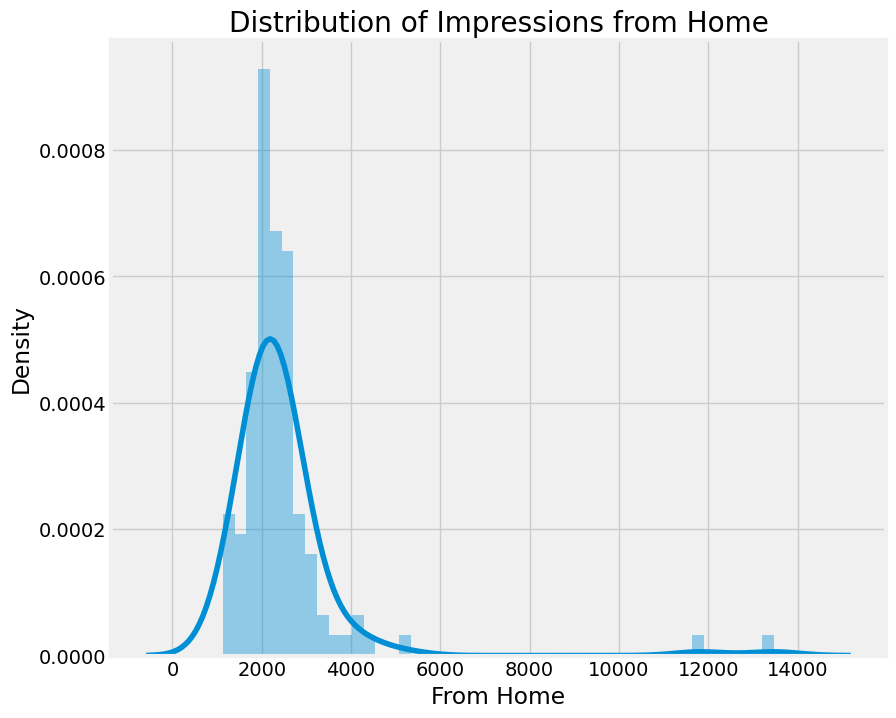

In [26]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(data['From Home'])
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_48180\2244665533.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


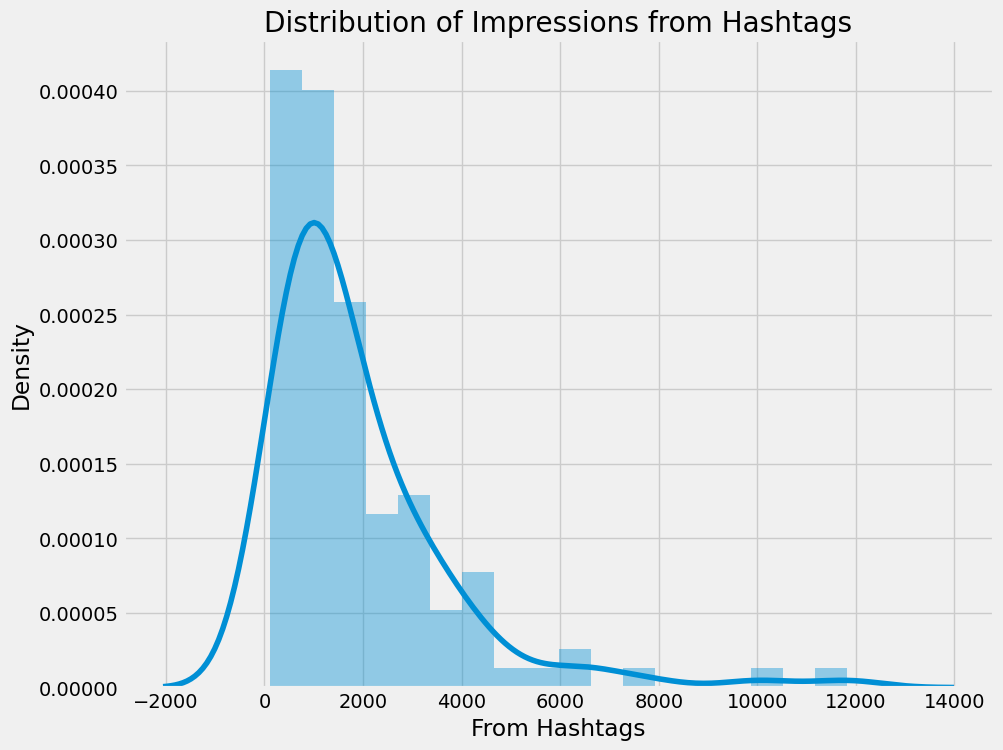

In [27]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

In [ ]:
#Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtags impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. Now, let's look at the distribution of impressions that I have received from the explore section of Instagram.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_48180\3861004323.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


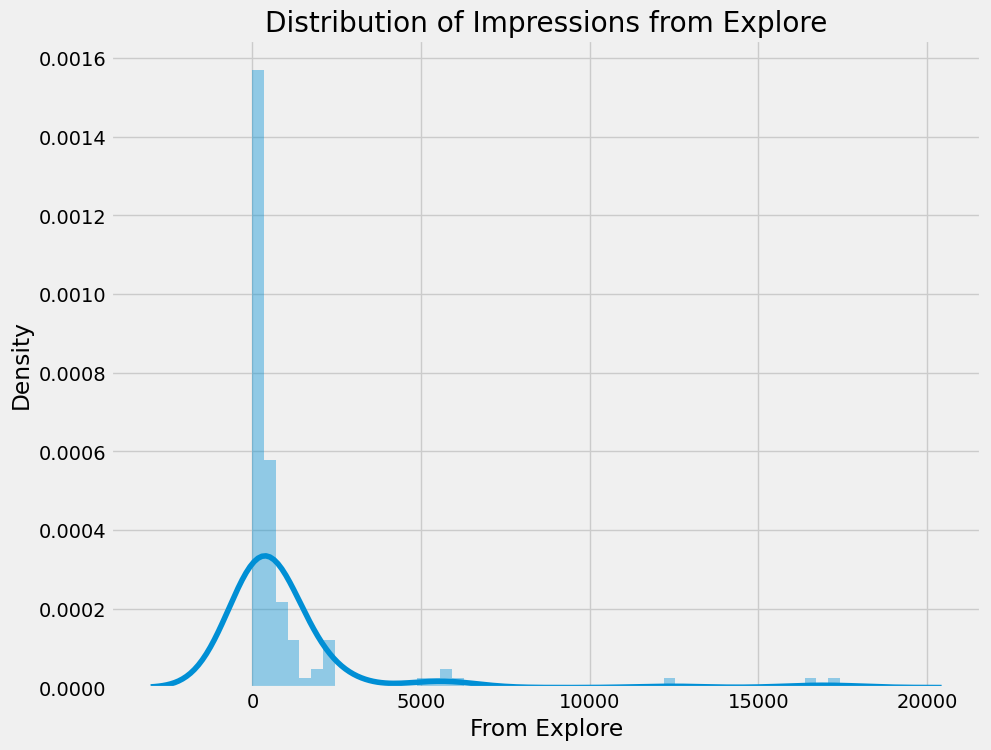

In [29]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

In [ ]:
#The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions that I have received from the explore section, I can say that Instagram doesn't recommend our posts much to the users. Some posts have received a good reach from the explore section, but it's still very low compared to the reach I receive from hashtags.

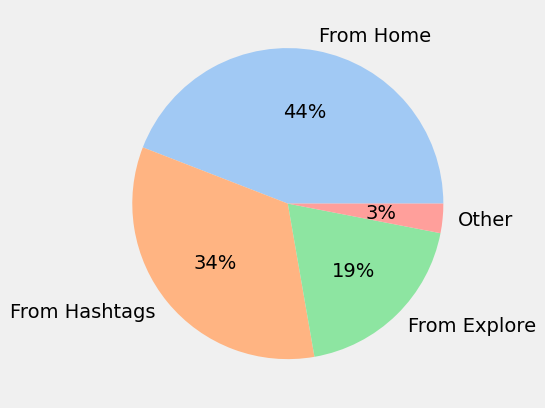

In [30]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]
palette_color = sns.color_palette('pastel')

plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

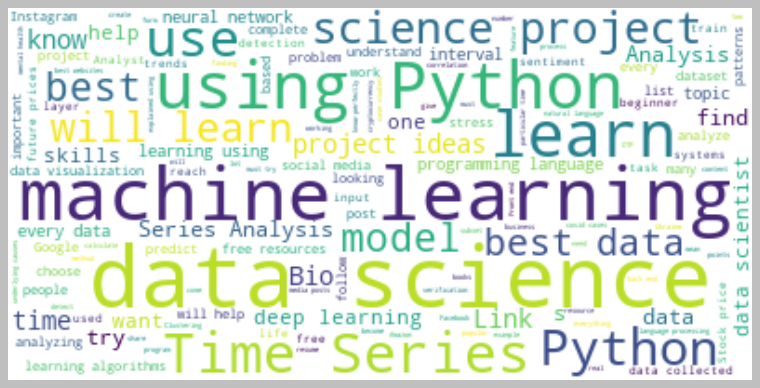

In [31]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

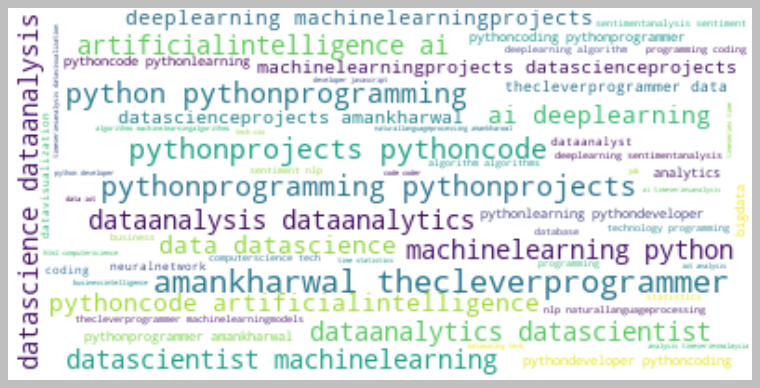

In [32]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

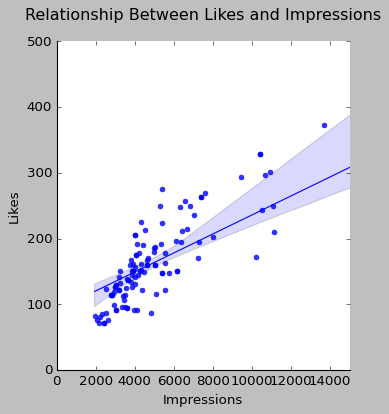

In [33]:
sns.lmplot(data=data, x="Impressions", y="Likes", fit_reg=True, scatter_kws={"s": 20}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Likes and Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 500)
plt.show()

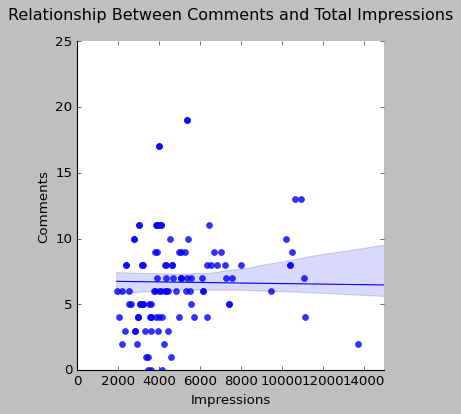

In [34]:
sns.lmplot(data=data, x="Impressions", y="Comments", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Comments and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 25)
plt.show()


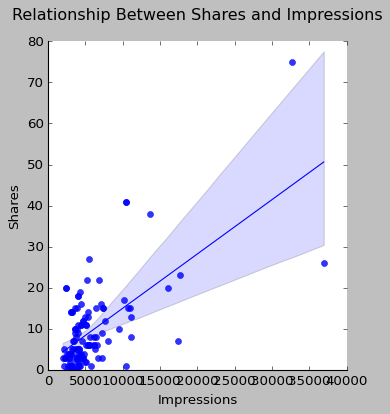

In [35]:
sns.lmplot(data=data, x="Impressions", y="Shares", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Shares and Impressions", pad=20)
plt.ylim(0, 80)
plt.xlim(0, 40000)
plt.show()

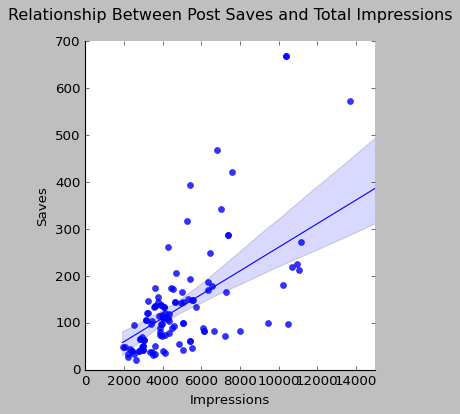

In [36]:
sns.lmplot(data=data, x="Impressions", y="Saves", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Post Saves and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 700)
plt.show()

In [40]:
import pandas as pd

# Load the data
data = pd.read_csv("data.csv", encoding='latin1')

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Print the sorted correlation values for the "Impressions" column
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [39]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


Text(0.5, 1.0, 'Relationship Between Profile Visits and Followers Gained')

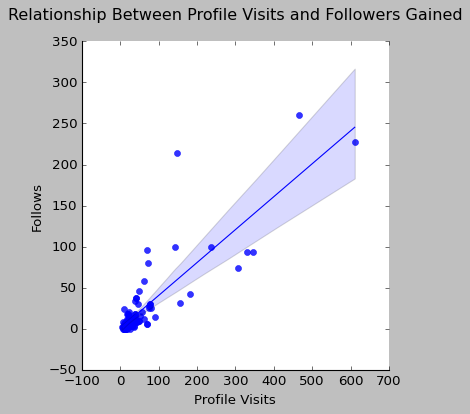

In [41]:
sns.lmplot(data=data, x="Profile Visits", y="Follows", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Profile Visits and Followers Gained", pad=20)

In [43]:
X = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:

from sklearn.metrics import mean_squared_error, r2_score

# Exclude non-numeric columns and define features and target
numeric_data = data.select_dtypes(include=[np.number])
X = numeric_data.drop('Impressions', axis=1)
y = numeric_data['Impressions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the PassiveAggressiveRegressor model
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Score (R^2): {score}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Score (R^2): 0.9994878233998311
Mean Squared Error: 19891.785870238436
R^2 Score: 0.9994878233998311


In [46]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PassiveAggressiveRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but PassiveAggressiveRegressor is expecting 10 features as input.